# AD4: conexión con la API del COVID19 y análisis con Pandas

Me conecto a la API https://api.covid19api.com/

In [1]:
!pip install pandas

# Importar Pandas
Luego de instaladas las librerías de Pandas, colocamos ```import``` para tener el acceso y luego importarlo como un **pd**.

In [73]:
import pandas as pd

Se utilizó *url* para hacer el vículo con la dirección del sitio web de donde se obtendrían los datos. Comprobamos que con introducir url la variable está relacionada automáticamente con esta dirección de la **API**. A través del siguiente código se le hace una petición de información a la **API** y el resultado se guarda en una variable. En esta caso particular, lo observamos en un modelo de cuadro.


In [2]:
url = "https://api.covid19api.com/countries"

In [3]:
url

'https://api.covid19api.com/countries'

In [4]:
df = pd.read_json(url)

In [5]:
df

,Country,Slug,ISO2
0,Gibraltar,gibraltar,GI
1,Oman,oman,OM
2,France,france,FR
3,Jersey,jersey,JE
4,Mali,mali,ML
...,...,...,...
243,Puerto Rico,puerto-rico,PR
244,Papua New Guinea,papua-new-guinea,PG
245,Saint Pierre and Miquelon,saint-pierre-and-miquelon,PM
246,Timor-Leste,timor-leste,TL


Se puede hacer un filtro de la fila requerida a través del siguiente código:

In [6]:
df[df["Country"] == "Spain"]

,Country,Slug,ISO2
141,Spain,spain,ES


# Datos de Covid19 en tiempo real
## Información de España

La primera prueba fue la extracción de los datos de covid19 en tiempo real para España. Con la librería **Pandas**, se llama a la funcion ```read_json()```, que devuelve los datos de la consulta.

In [7]:
url_rt_es = "https://api.covid19api.com/country/spain/status/confirmed/live"
df_rt_es = pd.read_json(url_rt_es)
df_rt_es

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
894,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-04 00:00:00+00:00
895,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-05 00:00:00+00:00
896,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-06 00:00:00+00:00
897,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-07 00:00:00+00:00


Con el cógido ``df_rt_es.head()`` se obtuvieron los datos de las cinco primeras líneas.

In [9]:
df_rt_es.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Spain,ES,,,,40.46,-3.75,0,confirmed,2020-01-26 00:00:00+00:00


Mientras que con el código ```df_rt_es.tail()``` se obtienen las últimas líneas.

In [10]:
df_rt_es.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
894,Spain,ES,,,,40.46,-3.75,12818184,confirmed,2022-07-04 00:00:00+00:00
895,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-05 00:00:00+00:00
896,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-06 00:00:00+00:00
897,Spain,ES,,,,40.46,-3.75,12890002,confirmed,2022-07-07 00:00:00+00:00
898,Spain,ES,,,,40.46,-3.75,12973615,confirmed,2022-07-08 00:00:00+00:00


# Graficar

Ya tenemos un cuadro con las siguientes columnas: país, código de país, provincia, ciudad, código de ciudad, latitud, longitud, número de casos, estado y la fecha. Particularmente de esta información nos interesa el número de casos y la fecha. El procedimiento que debo ejecutar es transformar la columna de control. Para ello convierto la columna de fecha en columna de control pidiéndole ya que me muestre los casos España desde el 20 de enero de 2020 a la actualidad con la expresión ```df_rt_es.set_index('Date')['Cases'].plot(title="Casos de Covid-19 en España desde 20/01/2020 hasta 29/06/2022")```. Debo darle un nombre de variable.

<AxesSubplot:title={'center':'Casos de Covid-19 en España'}, xlabel='Date'>

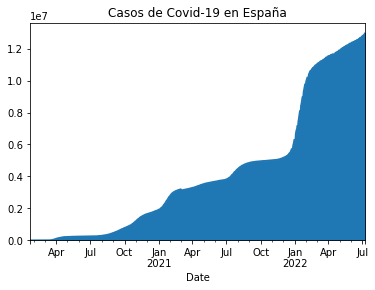

In [60]:
casos_es = df_rt_es.set_index('Date')['Cases']
casos_es.plot(title="Casos de Covid-19 en España",kind = "area")

# Datos de Panamá

Para los datos de Panamá debemos repetir el proceso. Solo utilizo las letras de la nomenclatura para el país y coloco el nombre del país en la url que utilizo. Si agregamos ```,kind="area"``` al final se pondría el gráfico de área y con ```,kind="bar"``` el gráfico de barras.

In [12]:
df[df["Country"] == "Panama"]

,Country,Slug,ISO2
190,Panama,panama,PA


In [13]:
url_rt_pa = "https://api.covid19api.com/country/panama/status/confirmed/live"
df_rt_pa = pd.read_json(url_rt_pa)
df_rt_pa

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-22 00:00:00+00:00
1,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-23 00:00:00+00:00
2,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-24 00:00:00+00:00
3,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-25 00:00:00+00:00
4,Panama,PA,,,,8.54,-80.78,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
895,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-05 00:00:00+00:00
896,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-06 00:00:00+00:00
897,Panama,PA,,,,8.54,-80.78,925254,confirmed,2022-07-07 00:00:00+00:00
898,Panama,PA,,,,8.54,-80.78,932710,confirmed,2022-07-08 00:00:00+00:00


<AxesSubplot:title={'center':'Casos de Covid-19 en Panamá'}, xlabel='Date'>

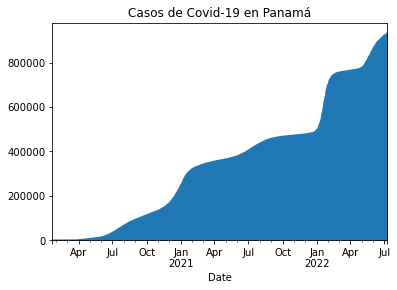

In [61]:
casos_pa = df_rt_pa.set_index('Date')['Cases']
casos_pa.plot(title="Casos de Covid-19 en Panamá",kind = "area")

# Datos de Costa Rica

Repetimos este procedimiento para todos los países, en este caso, de Centroamérica. Hay que hacer la salvedad que en cada código se deben cambiar la identificación de los datos que se quieren obtener.

In [21]:
df[df["Country"] == "Costa Rica"]

,Country,Slug,ISO2
242,Costa Rica,costa-rica,CR


In [34]:
url_rt_cr = "https://api.covid19api.com/country/costa-rica/status/confirmed/live"
df_rt_cr = pd.read_json(url_rt_cr)
df_rt_cr

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-22 00:00:00+00:00
1,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-23 00:00:00+00:00
2,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-24 00:00:00+00:00
3,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-25 00:00:00+00:00
4,Costa Rica,CR,,,,9.75,-83.75,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
895,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-05 00:00:00+00:00
896,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-06 00:00:00+00:00
897,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-07 00:00:00+00:00
898,Costa Rica,CR,,,,9.75,-83.75,904934,confirmed,2022-07-08 00:00:00+00:00


<AxesSubplot:title={'center':'Casos de Covid-19 en Costa Rica'}, xlabel='Date'>

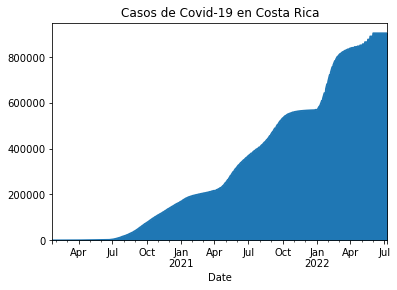

In [62]:
casos_cr = df_rt_cr.set_index('Date')['Cases']
casos_cr.plot(title="Casos de Covid-19 en Costa Rica",kind = "area")

# Datos de Nicaragua

In [36]:
df[df["Country"] == "Nicaragua"]

,Country,Slug,ISO2
36,Nicaragua,nicaragua,NI


In [37]:
url_rt_ni = "https://api.covid19api.com/country/nicaragua/status/confirmed/live"
df_rt_ni = pd.read_json(url_rt_ni)
df_rt_ni

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-22 00:00:00+00:00
1,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-23 00:00:00+00:00
2,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-24 00:00:00+00:00
3,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-25 00:00:00+00:00
4,Nicaragua,NI,,,,12.87,-85.21,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
895,Nicaragua,NI,,,,12.87,-85.21,14690,confirmed,2022-07-05 00:00:00+00:00
896,Nicaragua,NI,,,,12.87,-85.21,14721,confirmed,2022-07-06 00:00:00+00:00
897,Nicaragua,NI,,,,12.87,-85.21,14721,confirmed,2022-07-07 00:00:00+00:00
898,Nicaragua,NI,,,,12.87,-85.21,14721,confirmed,2022-07-08 00:00:00+00:00


<AxesSubplot:title={'center':'Casos de Covid-19 en Nicaragua'}, xlabel='Date'>

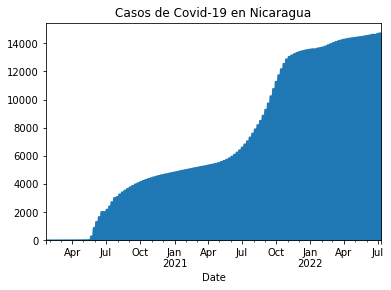

In [63]:
casos_ni = df_rt_ni.set_index('Date')['Cases']
casos_ni.plot(title="Casos de Covid-19 en Nicaragua",kind = "area")

# Datos de El Salvador

In [39]:
df[df["Country"] == "El Salvador"]

,Country,Slug,ISO2
139,El Salvador,el-salvador,SV


In [40]:
url_rt_sv = "https://api.covid19api.com/country/el-salvador/status/confirmed/live"
df_rt_sv = pd.read_json(url_rt_sv)
df_rt_sv

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-22 00:00:00+00:00
1,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-23 00:00:00+00:00
2,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-24 00:00:00+00:00
3,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-25 00:00:00+00:00
4,El Salvador,SV,,,,13.79,-88.9,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
895,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-05 00:00:00+00:00
896,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-06 00:00:00+00:00
897,El Salvador,SV,,,,13.79,-88.9,169646,confirmed,2022-07-07 00:00:00+00:00
898,El Salvador,SV,,,,13.79,-88.9,180970,confirmed,2022-07-08 00:00:00+00:00


<AxesSubplot:title={'center':'Casos de Covid-19 en El Salvador'}, xlabel='Date'>

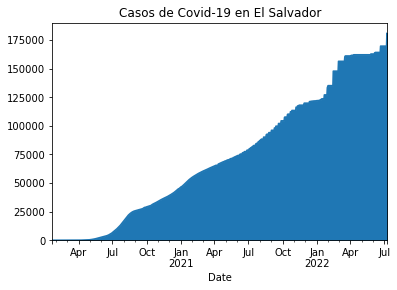

In [64]:
casos_sv = df_rt_sv.set_index('Date')['Cases']
casos_sv.plot(title="Casos de Covid-19 en El Salvador",kind = "area")

# Datos de Honduras

In [42]:
df[df["Country"] == "Honduras"]

,Country,Slug,ISO2
91,Honduras,honduras,HN


In [43]:
url_rt_hn = "https://api.covid19api.com/country/honduras/status/confirmed/live"
df_rt_hn = pd.read_json(url_rt_hn)
df_rt_hn

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-22 00:00:00+00:00
1,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-23 00:00:00+00:00
2,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-24 00:00:00+00:00
3,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-25 00:00:00+00:00
4,Honduras,HN,,,,15.2,-86.24,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
895,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-05 00:00:00+00:00
896,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-06 00:00:00+00:00
897,Honduras,HN,,,,15.2,-86.24,427718,confirmed,2022-07-07 00:00:00+00:00
898,Honduras,HN,,,,15.2,-86.24,429408,confirmed,2022-07-08 00:00:00+00:00


<AxesSubplot:title={'center':'Casos de Covid-19 en Honduras'}, xlabel='Date'>

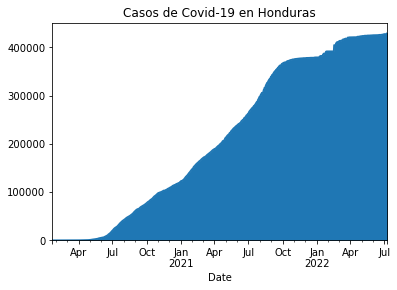

In [65]:
casos_hn = df_rt_hn.set_index('Date')['Cases']
casos_hn.plot(title="Casos de Covid-19 en Honduras",kind = "area")

# Datos de Guatemala

In [47]:
df[df["Country"] == "Guatemala"]

,Country,Slug,ISO2
239,Guatemala,guatemala,GT


In [48]:
url_rt_gt = "https://api.covid19api.com/country/guatemala/status/confirmed/live"
df_rt_gt = pd.read_json(url_rt_gt)
df_rt_gt

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-22 00:00:00+00:00
1,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-23 00:00:00+00:00
2,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-24 00:00:00+00:00
3,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-25 00:00:00+00:00
4,Guatemala,GT,,,,15.78,-90.23,0,confirmed,2020-01-26 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
895,Guatemala,GT,,,,15.78,-90.23,922340,confirmed,2022-07-05 00:00:00+00:00
896,Guatemala,GT,,,,15.78,-90.23,927473,confirmed,2022-07-06 00:00:00+00:00
897,Guatemala,GT,,,,15.78,-90.23,933259,confirmed,2022-07-07 00:00:00+00:00
898,Guatemala,GT,,,,15.78,-90.23,939300,confirmed,2022-07-08 00:00:00+00:00


<AxesSubplot:title={'center':'Casos de Covid-19 en Guatemala'}, xlabel='Date'>

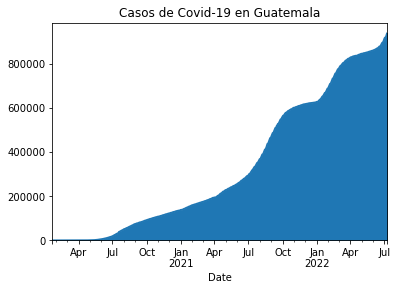

In [66]:
casos_gt = df_rt_gt.set_index('Date')['Cases']
casos_gt.plot(title="Casos de Covid-19 en Guatemala",kind = "area")

# Ploteamos los datos de los países

Para *plotear* dos o más países hay que seguir los siguientes pasos:

Volvemos a identificar las variables previas de lectura de *Json* de las dos *URLs* para no tener que repetir el proceso desde arriba al cerrar el documento.

Al igual que antes, se añaden todos los casos de los distintos países en una misma tabla.


In [68]:
pd.concat([casos_pa,casos_cr,casos_ni,casos_hn,casos_sv,casos_gt],axis=1)


,Cases,Cases,Cases,Cases,Cases,Cases
Date,,,,,,
2020-01-22 00:00:00+00:00,0,0,0,0,0,0
2020-01-23 00:00:00+00:00,0,0,0,0,0,0
2020-01-24 00:00:00+00:00,0,0,0,0,0,0
2020-01-25 00:00:00+00:00,0,0,0,0,0,0
2020-01-26 00:00:00+00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-07-05 00:00:00+00:00,925254,904934,14690,427718,169646,922340
2022-07-06 00:00:00+00:00,925254,904934,14721,427718,169646,927473
2022-07-07 00:00:00+00:00,925254,904934,14721,427718,169646,933259


Luego se definen la columnas con el país al que le corresponden los datos.

In [70]:
casos_pa_cr_ni_gt_sv_hn = pd.concat([casos_pa,casos_cr,casos_ni,casos_gt,casos_sv,casos_hn],axis=1)
casos_pa_cr_ni_gt_sv_hn.columns= ['Panamá','Costa Rica', 'Nicaragua', 'Guatemala', 'El Salvador', 'Honduras']
casos_pa_cr_ni_gt_sv_hn

,Panamá,Costa Rica,Nicaragua,Guatemala,El Salvador,Honduras
Date,,,,,,
2020-01-22 00:00:00+00:00,0,0,0,0,0,0
2020-01-23 00:00:00+00:00,0,0,0,0,0,0
2020-01-24 00:00:00+00:00,0,0,0,0,0,0
2020-01-25 00:00:00+00:00,0,0,0,0,0,0
2020-01-26 00:00:00+00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-07-05 00:00:00+00:00,925254,904934,14690,922340,169646,427718
2022-07-06 00:00:00+00:00,925254,904934,14721,927473,169646,427718
2022-07-07 00:00:00+00:00,925254,904934,14721,933259,169646,427718


Finalmente se muestra la tabla con las diferentes columnas. Aquí se pueden apreciar los diferentes casos de Covid19 en varios países de Centroamérica.

<AxesSubplot:title={'center':'Cuadro comparativo de casos Covid-19 en los países de Centroamérica'}, xlabel='Date'>

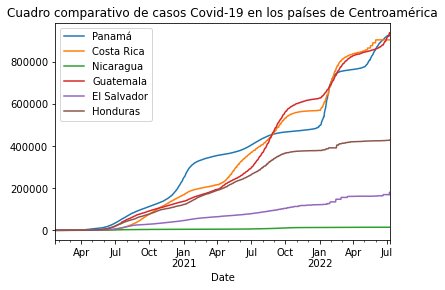

In [71]:
casos_pa_cr_ni_gt_sv_hn.plot(title="Cuadro comparativo de casos Covid-19 en los países de Centroamérica")